![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

 - 1:winter, 2:spring, 3:summer, 4:fall
 - year (0: 2011, 1: 2012)

In [5]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

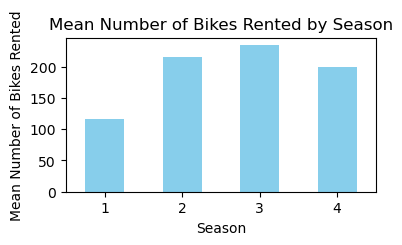

In [6]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the mean number of bikes rented for each season
mean_bikes_season = bikes.groupby('season')['total'].mean()

# Plotting
plt.figure(figsize=(4, 2))
mean_bikes_season.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Mean Number of Bikes Rented')
plt.title('Mean Number of Bikes Rented by Season')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


###1:winter, 2:spring, 3:summer, 4:fall

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


### Análisis de los datos

1. Resalta la media en las estaciones 2 (primavera) y 3 (verano) lo cuál tiene sentido pues es la época del año que cuenta con temperaturas mas amigables para los usuarios. Diferente de otoño e invierno donde se observa la mayor caida en las rentas proemdio de bicicletas.
2. En otras estadísticas descriptivas se observa que siempre hubo al menos una bicicleta rentada. También que, a pesar de que otoño muestra una caida con respecto a primavera y verano, el momento de mayores bicicletas rentadas se situa en esta estación.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

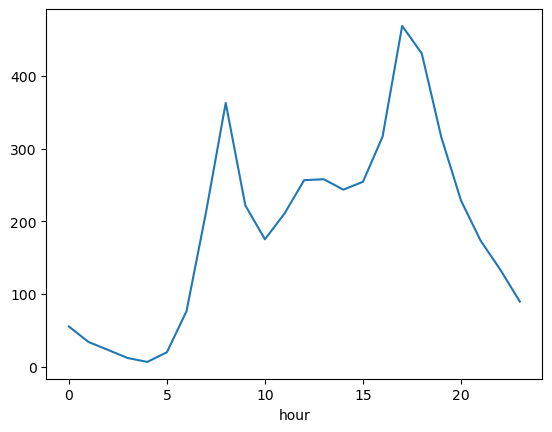

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

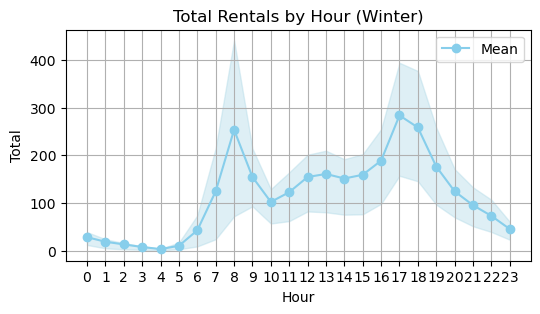

In [10]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
# Filter the DataFrame where season is equal to 1
season_1_data = bikes[bikes['season'] == 1]
###1:winter, 2:spring, 3:summer, 4:fall
# Calculate descriptive statistics for the 'total' column grouped by 'hour'
hourly_stats_season_1 = season_1_data.groupby('hour')['total'].describe()

# Plotting
plt.figure(figsize=(6, 3))
hourly_stats_season_1['mean'].plot(marker='o', color='skyblue', label='Mean')
plt.fill_between(hourly_stats_season_1.index, hourly_stats_season_1['25%'], hourly_stats_season_1['75%'], color='lightblue', alpha=0.4)
plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Total Rentals by Hour (Winter)')
plt.xticks(hourly_stats_season_1.index)  # Set x-axis ticks to match each hour
plt.legend()
plt.grid(True)
plt.show()

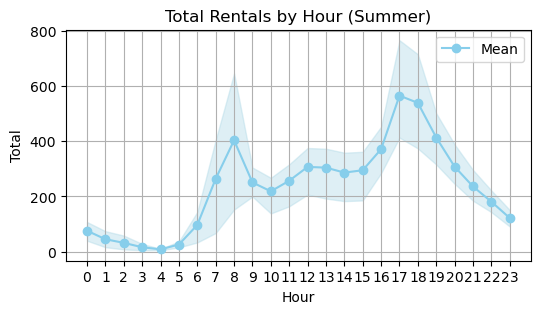

In [11]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Filter the DataFrame where season is equal to 3
season_3_data = bikes[bikes['season'] == 3]
###1:winter, 2:spring, 3:summer, 4:fall
# Calculate descriptive statistics for the 'total' column grouped by 'hour'
hourly_stats_season_3 = season_3_data.groupby('hour')['total'].describe()

# Plotting
plt.figure(figsize=(6, 3))
hourly_stats_season_3['mean'].plot(marker='o', color='skyblue', label='Mean')
plt.fill_between(hourly_stats_season_3.index, hourly_stats_season_3['25%'], hourly_stats_season_3['75%'], color='lightblue', alpha=0.4)
plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Total Rentals by Hour (Summer)')
plt.xticks(hourly_stats_season_3.index)  # Set x-axis ticks to match each hour
plt.legend()
plt.grid(True)
plt.show()


### Análisis de los datos

1. El comportamiento en ambas gráficas es prácticamente igual a pesar de ser estaciones en condiciones climaticas totalmente opuestas.
2. Dentro de ese comportamiento se observan picos en las los 8:00 y 17:00. Se puede inferir que los usuarios de estas bicicletas las usan para dirigirse a sus trabajos.
3. Un leve pico intermedio a las 12:00 y las 13:00. Posiblemente algunos usuarios aprovechan esta hora para ir a almorzar.
4. A pesar de la similitud en el comportamiento entre estaciones si se comparan ambos, el pico máximo de invierno no llega a las 300 rentas mientras que en el verano casi toca el techo de las 600 rentas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [17]:
import statsmodels.api as sm 

season_dummies = pd.get_dummies(bikes['season'], prefix='season')

#Se concatenan las variables dummy con el conjunto de datos original
bikes_LR = pd.concat([bikes, season_dummies], axis=1)

# Seleccionar las variables predictoras y la variable de respuesta
X = bikes_LR[['hour', 'season_1', 'season_2', 'season_3']]
y = bikes_LR['total']

# Ajustar el modelo de regresión lineal
model = LinearRegression().fit(X, y)

# Imprimir los coeficientes
print("Coeficientes del modelo:")
print("Intercepto:", model.intercept_)
print("Coeficientes para las variables predictoras:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

#model = sm.OLS(y, sm.add_constant(X)).fit()
 
#Coeficientes
#print(model.summary())



Coeficientes del modelo:
Intercepto: 77.65285541066137
Coeficientes para las variables predictoras:
hour : 10.545206094069927
season_1 : -84.08311787296758
season_2 : 16.234114043098025
season_3 : 35.384432072963975
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:04:11   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                    

### Análisis
1. El intercepto indica que cuando las variables independientes toman valor 0 el promedio estimado de *y* (número total de alquileres) es de 69.5. Es decir que en promedio se esperan alrededor de 69 alquileres cuando no hay efecto de la hora del día ni de la estación del año.
2. Para la variable "hour": Este coeficiente indica cómo cambia el número total de alquileres para cada unidad de cambio en la variable "hour" (hora). En este caso, el coeficiente es 10.55, lo que significa que por cada hora adicional del día, se espera un aumento de aproximadamente 10.55 alquileres en promedio, manteniendo constantes las demás variables.
3. Estos coeficientes indican cómo cambia el número total de alquileres cuando la estación del año es la correspondiente a cada variable "season_X", en comparación con cuando la estación del año es otra. Por ejemplo:

- Para "season_1" (invierno), el coeficiente indica cómo cambia el número total de alquileres cuando es invierno en comparación con las otras estaciones del año.
- Para "season_2" (primavera), el coeficiente indica cómo cambia el número total de alquileres cuando es primavera en comparación con las otras estaciones del año.
- Para "season_3" (verano), el coeficiente indica cómo cambia el número total de alquileres cuando es verano en comparación con las otras estaciones del año.
- Para "season_4" (otoño), el coeficiente indica cómo cambia el número total de alquileres cuando es otoño en comparación con las otras estaciones del año.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [18]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
min_gain = 0.001
 
# Definición de la función Gini impurity
def gini_impurity(y):
    p = y.mean()
    return 1 - (p ** 2 + (1 - p) ** 2)
 
# Definición de la función de ganancia Gini
def gini_gain(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    gini_y = gini_impurity(y)
    gini_l = gini_impurity(y_l)
    gini_r = gini_impurity(y_r)
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    return gini_impurity_
 
# Función para encontrar el mejor punto de corte 
def manual_best_split(X, y, num_pct):
    features = X.columns
    best_gain = 0
    best_split = None
    best_var = None
    for j in features:
        unique_values = sorted(X[j].unique())
        for i in range(len(unique_values) - 1):
            split = (unique_values[i] + unique_values[i+1]) / 2
            gain = gini_gain(X[j], y, split)
            if gain > best_gain:
                best_gain = gain
                best_split = split
                best_var = j
    return best_var, best_split, best_gain
 
# Dividir los datos
def manual_split_data(X, y, j, split):
    filter_l = X[j] < split
    X_l = X.loc[filter_l]
    y_l = y.loc[filter_l]
    X_r = X.loc[~filter_l]
    y_r = y.loc[~filter_l]
    return X_l, y_l, X_r, y_r
 
# Construir el árbol de decisiones 
def manual_tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    if X.shape[0] == 1 or level == max_depth:
        return {'prediction': y.mean(), 'level': level, 'split': None}
    j, split, gain = manual_best_split(X, y, num_pct)
    if gain < min_gain:
        return {'prediction': y.mean(), 'level': level, 'split': None}
    X_l, y_l, X_r, y_r = manual_split_data(X, y, j, split)
    tree = {'prediction': y.mean(), 'level': level, 'split': (j, split)}
    tree['left'] = manual_tree_grow(X_l, y_l, level+1, min_gain, max_depth, num_pct)
    tree['right'] = manual_tree_grow(X_r, y_r, level+1, min_gain, max_depth, num_pct)
    return tree
 
# Aplicación de la función para construir el árbol
tree = manual_tree_grow(bikes[['hour', 'season']], bikes['total'], max_depth=6)
 
# F
# unción para hacer predicciones con el árbol de decisiones
def manual_tree_predict(tree, X):
    predictions = []
    for _, row in X.iterrows():
        node = tree
        while node.get('split') is not None:
            j, split = node['split']
            if row[j] < split:
                node = node['left']
            else:
                node = node['right']
        predictions.append(node['prediction'])
    return np.array(predictions)
 
# Ejemplo de predicción con el árbol de decisiones
predictions = manual_tree_predict(tree, bikes[['hour', 'season']])
predictions

array([ 28.2920354 ,  18.76106195,  13.20560748, ..., 162.87719298,
       126.4122807 ,  89.29824561])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [19]:
# Celda 5
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

#Train y Test
X_train, X_test, y_train, y_test = train_test_split(bikes[['season', 'hour']], bikes['total'], test_size=0.33, random_state=0)


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())


Text(0, 0.5, 'Accuracy')

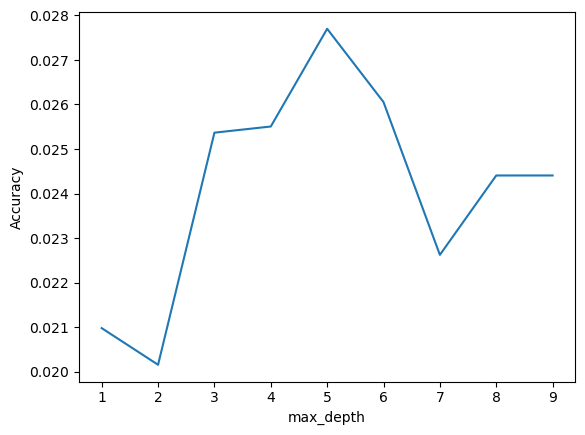

In [20]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [21]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.027698103989326716, 5)

In [22]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [28]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'importance':clf.feature_importances_}).sort_values('importance')

,importance
0,0.223542
1,0.776458


In [29]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X_train, y_train, cv=10)).describe()

count    10.000000
mean      0.027698
std       0.003647
min       0.021918
25%       0.026063
50%       0.027435
75%       0.028797
max       0.035665
dtype: float64

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [30]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [31]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [32]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [34]:
# Celda 6
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Árbol de decisión con calibración del parámetro max_depth
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_clf.fit(X_train, y_train)
 
# Predicciones del árbol de decisión
tree_preds = tree_clf.predict(X_test)
 
# Evaluación del árbol de decisión
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_f1 = f1_score(y_test, tree_preds)
 
print("Árbol de Decisión:")
print(f"Accuracy: {tree_accuracy}")
print(f"F1-Score: {tree_f1}")
 
# Regresión logística
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
 
# Predicciones de la regresión logística
log_reg_preds = log_reg.predict(X_test)
 
# Evaluación de la regresión logística
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_f1 = f1_score(y_test, log_reg_preds)
 
print("\nRegresión Logística:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"F1-Score: {log_reg_f1}")

Árbol de Decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Regresión Logística:
Accuracy: 0.614
F1-Score: 0.6106254203093476


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota:
 
Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.
 
Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.
 
Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:
 
* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"
 
Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).
 
Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [35]:
# Celda 7

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
 
# Creación de muestras de bootstrap para cada tipo de modelo
np.random.seed(123)
n_samples = X_train.shape[0]
 
# Muestras para árboles de decisión con diferentes valores de max_depth
samples_tree_max_depth = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]
 
# Muestras para árboles de decisión con diferentes valores de min_samples_leaf
samples_tree_min_samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]
 
# Muestras para regresiones logísticas
samples_logistic_regression = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]
 
# Entrenamiento y evaluación de árboles de decisión con diferentes valores de max_depth
trees_max_depth = [DecisionTreeClassifier(max_depth=i).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                   for i, samples in enumerate(samples_tree_max_depth, start=1)]
accuracy_tree_max_depth = [accuracy_score(tree.predict(X_test), y_test) for tree in trees_max_depth]
f1_tree_max_depth = [f1_score(tree.predict(X_test), y_test) for tree in trees_max_depth]
 
# Entrenamiento y evaluación de árboles de decisión con diferentes valores de min_samples_leaf
trees_min_samples_leaf = [DecisionTreeClassifier(min_samples_leaf=i).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                          for i, samples in enumerate(samples_tree_min_samples_leaf, start=1)]
accuracy_tree_min_samples_leaf = [accuracy_score(tree.predict(X_test), y_test) for tree in trees_min_samples_leaf]
f1_tree_min_samples_leaf = [f1_score(tree.predict(X_test), y_test) for tree in trees_min_samples_leaf]
 
# Entrenamiento y evaluación de regresiones logísticas
logistic_regressions = [LogisticRegression(max_iter=1000).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                        for samples in samples_logistic_regression]
accuracy_logistic_regression = [accuracy_score(lr.predict(X_test), y_test) for lr in logistic_regressions]
f1_logistic_regression = [f1_score(lr.predict(X_test), y_test) for lr in logistic_regressions]
 
# Evaluación de los modelos individuales
print("Evaluación de los modelos individuales:")
print("Árboles de decisión con diferentes valores de max_depth:")
print("Accuracy:", np.mean(accuracy_tree_max_depth))
print("F1-Score:", np.mean(f1_tree_max_depth))
print("Árboles de decisión con diferentes valores de min_samples_leaf:")
print("Accuracy:", np.mean(accuracy_tree_min_samples_leaf))
print("F1-Score:", np.mean(f1_tree_min_samples_leaf))
print("Regresiones Logísticas:")
print("Accuracy:", np.mean(accuracy_logistic_regression))
print("F1-Score:", np.mean(f1_logistic_regression))
 
# Realizar votación mayoritaria sobre los 300 modelos
y_pred_tree_max_depth = pd.DataFrame(index=X_test.index, columns=list(range(100)))
y_pred_tree_min_samples_leaf = pd.DataFrame(index=X_test.index, columns=list(range(100)))
y_pred_logistic_regression = pd.DataFrame(index=X_test.index, columns=list(range(100)))
 
for i, tree in enumerate(trees_max_depth):
    y_pred_tree_max_depth[i] = tree.predict(X_test)
for i, tree in enumerate(trees_min_samples_leaf):
    y_pred_tree_min_samples_leaf[i] = tree.predict(X_test)
for i, lr in enumerate(logistic_regressions):
    y_pred_logistic_regression[i] = lr.predict(X_test)
 
y_pred_tree_max_depth_majority = (y_pred_tree_max_depth.sum(axis=1) >= 50).astype(int)
y_pred_tree_min_samples_leaf_majority = (y_pred_tree_min_samples_leaf.sum(axis=1) >= 50).astype(int)
y_pred_logistic_regression_majority = (y_pred_logistic_regression.sum(axis=1) >= 50).astype(int)
 
y_pred_ensemble = pd.concat([y_pred_tree_max_depth_majority, y_pred_tree_min_samples_leaf_majority, y_pred_logistic_regression_majority], axis=1)
y_pred_ensemble = (y_pred_ensemble.sum(axis=1) >= 2).astype(int)
 
# Evaluación del ensamble
accuracy_ensemble = accuracy_score(y_pred_ensemble, y_test)
f1_ensemble = f1_score(y_pred_ensemble, y_test)
 
print("\nEvaluación del ensamble:")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_ensemble)

Evaluación de los modelos individuales:
Árboles de decisión con diferentes valores de max_depth:
Accuracy: 0.5711599999999999
F1-Score: 0.5726428252478546
Árboles de decisión con diferentes valores de min_samples_leaf:
Accuracy: 0.5952666666666666
F1-Score: 0.5966046902628522
Regresiones Logísticas:
Accuracy: 0.6137733333333333
F1-Score: 0.5983656137690138

Evaluación del ensamble:
Accuracy: 0.6546666666666666
F1-Score: 0.6605504587155963


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [37]:
# Celda 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
 
# Modelos de árboles de decisión con diferentes parámetros
clf_tree_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                       n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
clf_tree_min_samples_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5),
                                              n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
clf_logistic_regression = BaggingClassifier(base_estimator=LogisticRegression(),
                                            n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
 
# Entrenamiento de los modelos
clf_tree_max_depth.fit(X_train, y_train)
clf_tree_min_samples_leaf.fit(X_train, y_train)
clf_logistic_regression.fit(X_train, y_train)
 
# Predicción de cada modelo
y_pred_tree_max_depth = clf_tree_max_depth.predict(X_test)
y_pred_tree_min_samples_leaf = clf_tree_min_samples_leaf.predict(X_test)
y_pred_logistic_regression = clf_logistic_regression.predict(X_test)
 
# Evaluación de cada modelo individualmente
accuracy_tree_max_depth = accuracy_score(y_pred_tree_max_depth, y_test)
f1_score_tree_max_depth = f1_score(y_pred_tree_max_depth, y_test)
 
accuracy_tree_min_samples_leaf = accuracy_score(y_pred_tree_min_samples_leaf, y_test)
f1_score_tree_min_samples_leaf = f1_score(y_pred_tree_min_samples_leaf, y_test)
 
accuracy_logistic_regression = accuracy_score(y_pred_logistic_regression, y_test)
f1_score_logistic_regression = f1_score(y_pred_logistic_regression, y_test)
 
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors_tree_max_depth = 1 - clf_tree_max_depth.oob_score_
errors_tree_min_samples_leaf = 1 - clf_tree_min_samples_leaf.oob_score_
errors_logistic_regression = 1 - clf_logistic_regression.oob_score_
 
alpha_tree_max_depth = (1 - errors_tree_max_depth) / (1 - errors_tree_max_depth).sum()
alpha_tree_min_samples_leaf = (1 - errors_tree_min_samples_leaf) / (1 - errors_tree_min_samples_leaf).sum()
alpha_logistic_regression = (1 - errors_logistic_regression) / (1 - errors_logistic_regression).sum()
 
# Realizar la votación ponderada
weighted_sum = (y_pred_tree_max_depth * alpha_tree_max_depth + 
                y_pred_tree_min_samples_leaf * alpha_tree_min_samples_leaf + 
                y_pred_logistic_regression * alpha_logistic_regression)
 
# Aplicar umbral para obtener las predicciones finales
y_pred_weighted = (weighted_sum >= 0.5).astype(int)
 
# Evaluación del modelo ponderado
accuracy_weighted_voting = accuracy_score(y_pred_weighted, y_test)
f1_score_weighted_voting = f1_score(y_pred_weighted, y_test)
 
# Mostrar resultados
print("Resultados del modelo ponderado:")
print("Accuracy:", accuracy_weighted_voting)
print("F1 Score:", f1_score_weighted_voting)

Resultados del modelo ponderado:
Accuracy: 0.648
F1 Score: 0.6908665105386417


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

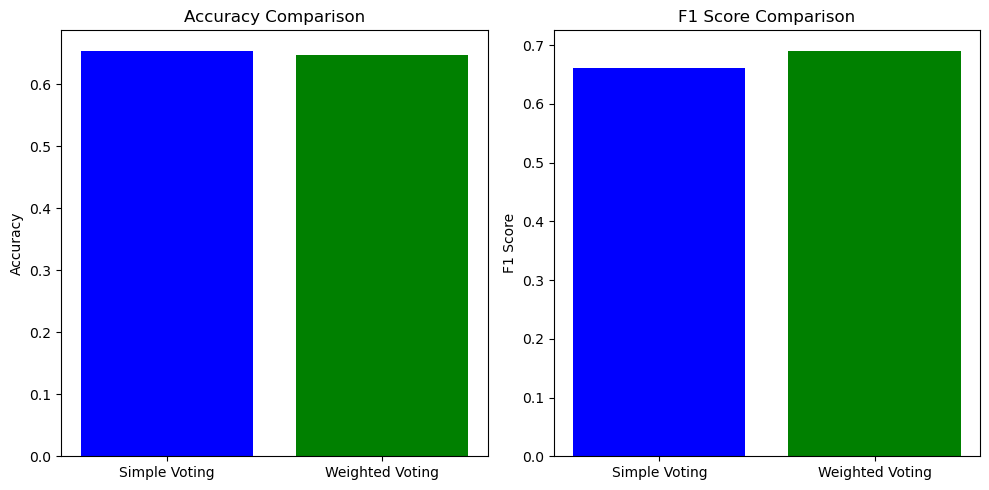

In [38]:
# Celda 9

import matplotlib.pyplot as plt

# Data
models = ['Simple Voting', 'Weighted Voting']
accuracy_scores = [accuracy_ensemble, accuracy_weighted_voting]
f1_scores = [f1_ensemble, f1_score_weighted_voting]

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()
